# This notebook will explain how to run molecular dynamic simulations with openmm

This notebook will use the **AmberSimulation** class found in the **sw_openmm.py** module.

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class as detailed in the first tutorial.

The second module to import is **sw_openmm** so we can use the **AmberSimulation** class.


In [1]:
from modules.sw_directories import *
from modules.sw_openmm import *
import os as os

# Setting up *Manager* and *Simulation* classes

The **simulation** class is a new class that handles openmm simulations. This section will provide a quick intro to calling parameters from the **AmberSimulation** class.

In [2]:
# Retrieve the path to the main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

We will need to load an amber topology and coordinate file to run a simulation. For this, load the files generated for the 3x3 3HB_10_polymer array built in the **tutorial_4**.

In [3]:
# Retrieve the amber topology and coordinates for the system
# Unlike before, unpack this output into a 'top' and a 'coord' variable
top, coord = manager.load_amber_filepaths("3HB_10_polymer_3_3_array_48672")

In [4]:
# Check the toppology file is found
top

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_48672.prmtop'

In [5]:
# Check the coordinate file is found
coord

'/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_48672.rst7'

Now we can set up a **simulation** object using the **AmberSimulation** class by the manager object and the topology and coordinate files to it.

In [6]:
# Pass manager, topology file and coordinate file to AmberSimulation class
simulation = AmberSimulation(manager, top, coord)

We have a couple of methods that return some information about our simulation: <br>

repr(simulation) - will return simulation parameters
str(simulation) - will retrun the name of the simulation

In [7]:
# Return the name of the simulation
str(simulation)

'Amber simulation object of - 3HB_10_polymer_3_3_array_48672'

In [8]:
# Return the parameters of the simulation
repr(simulation)

Simulation parameters: ('1', '300', '2.0, 1.0, 1000, 1000')


"Simulation parameters given in the following format: ('pressure', 'temperature', 'timestep, friction coefficient, total steps, reporter freqeuncy')"

We can also call the parameters of the simulation in another way following this format: <br>

simulation.parameter <br>

Where the parameters can be: <br>
    - temp <br>
    - pressure <br>
    - timestep <br>
    - friction_coeff <br>
    - total_steps <br>
    - reporter_freq <br>

In [9]:
# Calling simulation paramters individually
simulation.temp, simulation.pressure, simulation.timestep, simulation.friction_coeff, simulation.total_steps, simulation.reporter_freq

(300, 1, 2.0, 1.0, 1000, 1000)

Those are general parameters, but we have another set of parameters for annealing which can be called by running: **simulation.anneal_parameters**. More information can be found on these in the **openmm_simulation_guide.ipynb**.

In [10]:
# Show annealing parameters
simulation.anneal_parameters

[300, 700, 5, 3000, 100]

There are ways to set parameters for simulation and more details can be found in **openmm_simulation_guide**. If you want to run simulations with different parameters it is essential to learn these additional methods, otherwise the parameters will be set as the above ones by default.

An important thing to note before running simulations is that all outputs will be saved to a specific path. <br>

*~/polymersimulator/pdb_files/systems/system_name/**simulation_folder***

The **simulation_folder** will have a specific date-timestamp, i.e. **2024-09-04_175419**, so a final path will look like this: <br>

*~/polymersimulator/pdb_files/systems/system_name/**2024-09-04_175419***

The timestamp is in the format: **year-month-day_time**, with time being; hours-minutes-seconds. The reasoning for this super specific timestamp is to allow for simulations to be run with the same system without overwriting any previously generated files - allowing for repeats.

# Running simulations

Now we have set up a simulation object for our system, we can start running some simulations with it.

Much more information regarding simulations with full explanations can be found in **openmm_simulation_guide** the methods and explanations below are not as in depth and the methods here are provided as a quick start guide.

#### Recommended recipes

For a molecular dynamic simulation, you will want to create a *recipe*. This is series of steps you are taking to reach and run the production run.

1. Minimization --> Annealing -- > Equilibration --> Production run <br>
**For use with complex mixtures of molecules**<br>
2. Minimization --> Equilibration --> Production run <br>
**For use with systems where the initial structure is to be investigated**

For the systems of arrays, we will use recipe **2** as we want to simulate arrays of our given molecules. (annealing will randomize the the distributions of molecules within a system)

For each step of the simulation, AmberSimulation class (which we have created the 'simulation' instance of) has a method to carry it out. The outputs of this stage will be a new simulation instance (i.e. 'minimized_sim' after minimizing the simulation) and for other stages (annealing, equilibrations and production) a path to the datafile created from that stage of the simulation will also be returned.


In [11]:
# The first step of a simulation is to minimize the energy of our system - call the 'minimize_energy()' method from the simulation class
minimized_sim = simulation.minimize_energy()

# Note: this stage could take a while depending on how good your pc is, go make a tea or something

The next stage is to equilibrate the simulation - in some cases you may want to anneal the system first. As a test we will use the default parameters that were printed out earlier. Equilibration will allow the system to reach the correct density at a given temperature and pressure.

In [12]:
# Now equilibrate the system to hit the target pressure - the default pressure is set at 1 atmosphere
equilibrated_sim = simulation.equilibrate(minimized_sim)

As mentioned before, there are 2 outputs from this stage. The first is a simulation instance to be passed to next stage of the simulation and the second is a data file we can view. If a line does not show on the graphs the simulation must be run for longer (or the frequency of recording data increased) this is because there is only one recorded data point - don't worry! We can change this before the next stage of the simulation.

In [15]:
# Check the outputs from equilibration
equilibrated_sim

(<openmm.app.simulation.Simulation at 0x7f7dc894e780>,
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_1_atm_data_2024-09-04_175419.txt')

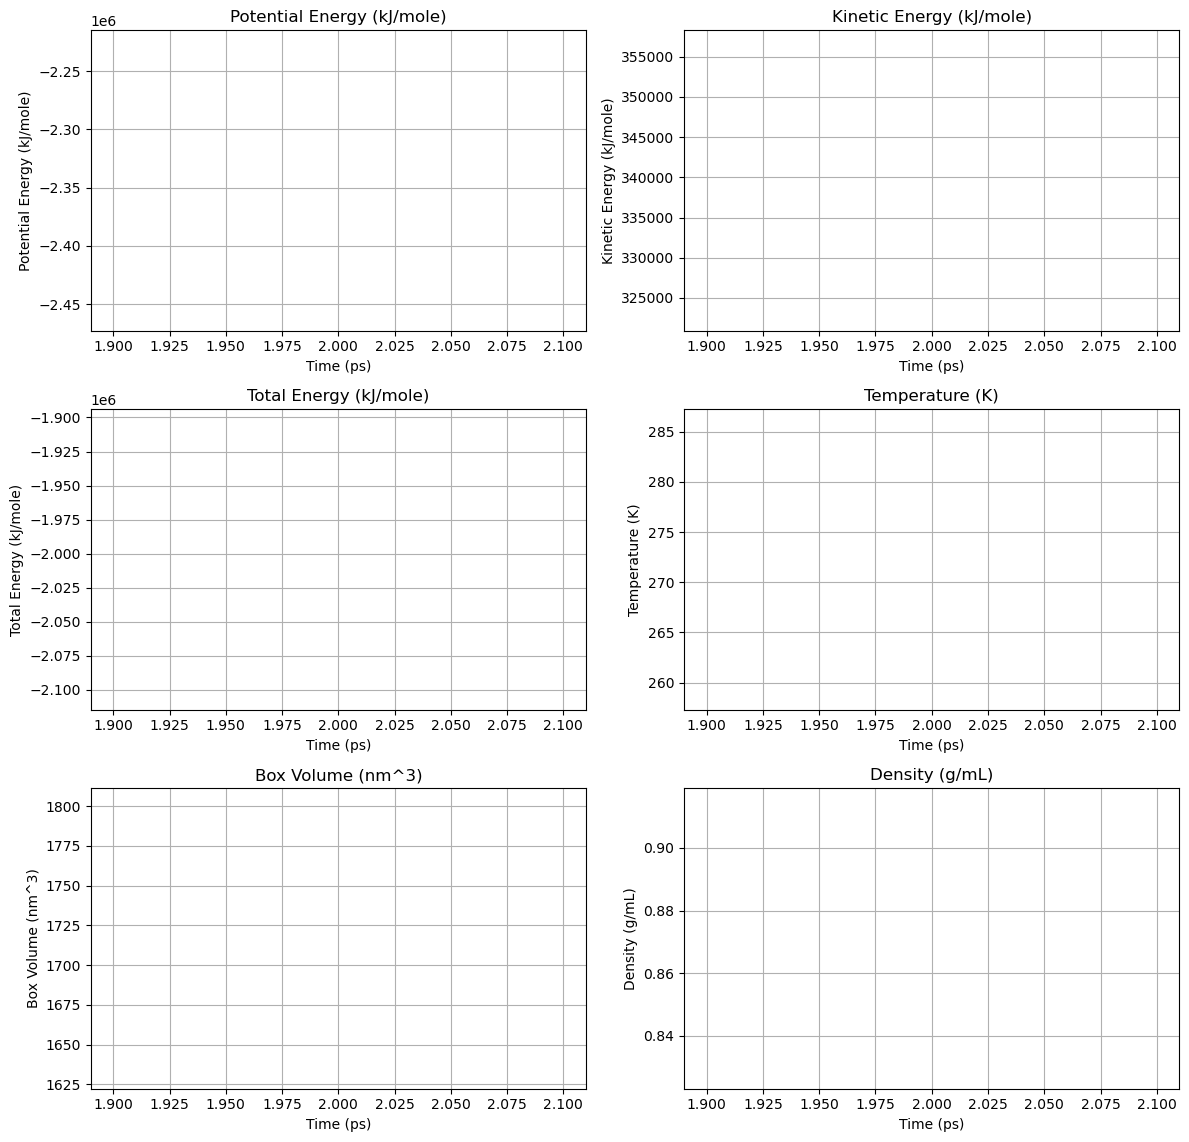

In [14]:
# Graph the data - pass the second 
simulation.graph_state_data(equilibrated_sim[1])

Lets set more steps for the simulation so we can visualise the data afterwards. The default was 1000 steps and data is only recorded every 1000 steps (this can also be changed with **simulation.set_reporter_freq(100)** to produce data point more frequently) - but for this example we will increase the total number of steps to 10,000 steps.

In [19]:
# Increase the total number of steps to 10,000
simulation.set_total_steps(10000)

Total steps for simulation set to:  10000


In [22]:
# Pass the equilibrated simulation instance to the 'simulation.production_run' method
production = simulation.production_run(equilibrated_sim[0])

# Note: this stage could take a while depending on how good your pc is, go paint a picture or something

In [23]:
# Check the outputs from production
production

(<openmm.app.simulation.Simulation at 0x7f7e43baab70>,
 '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_prod_data_2024-09-04_175419.txt')

Now when graphing the data, 10 data points are seen. A .png file of this data is also saved when it 

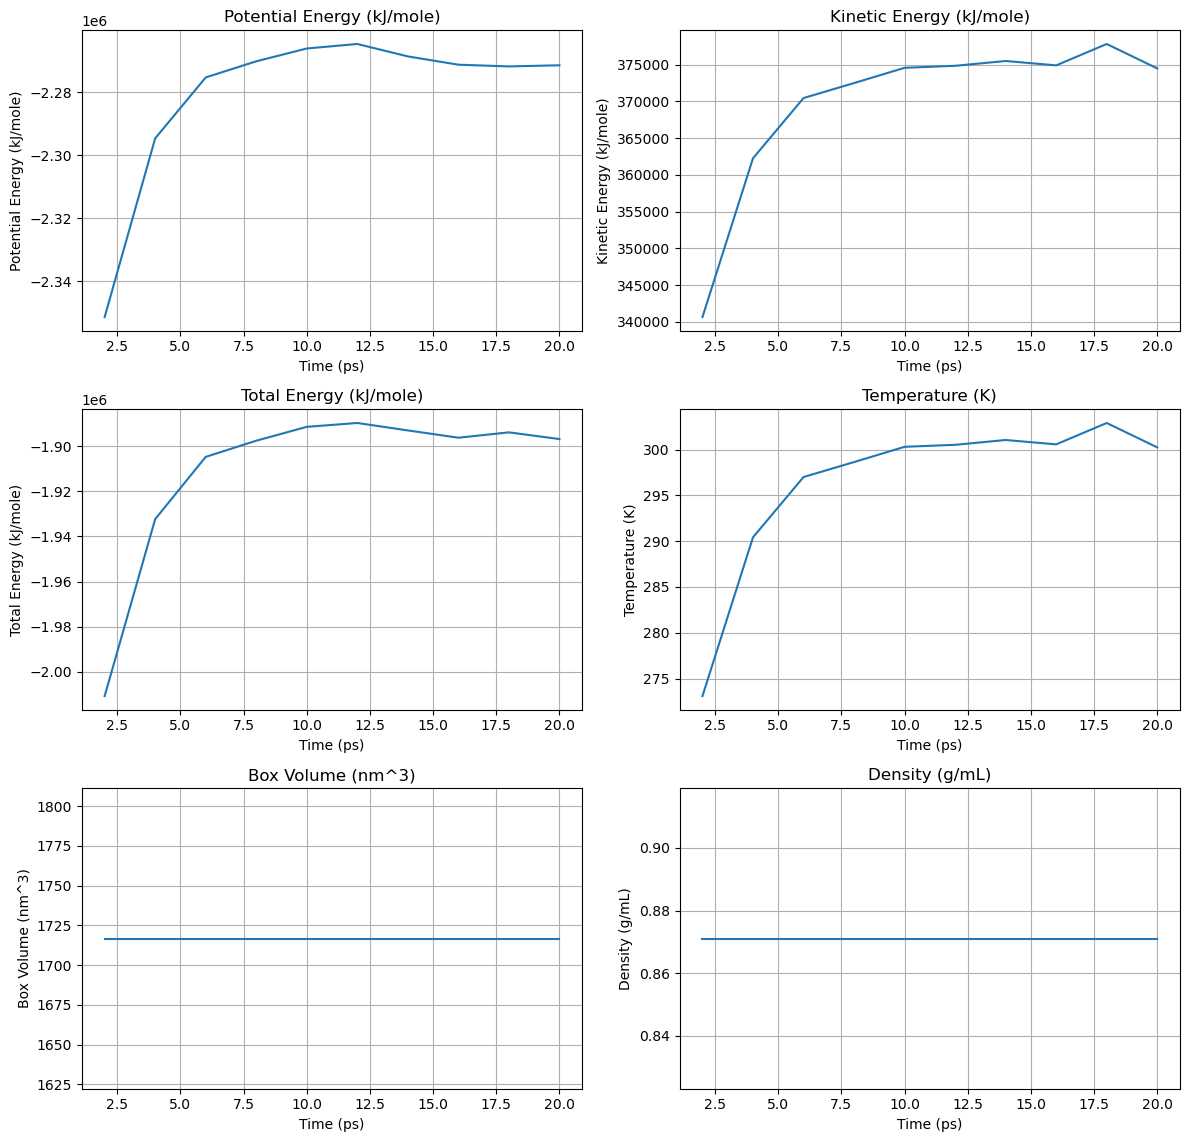

In [24]:
# Graph the data - pass the second 
simulation.graph_state_data(production[1])

The final thing is to see if the generated files can be found and then used for analysis

Use the **retrieve_files_for_MDAnalysis** method along with the system name and assign the output to a variable called **output_files**

In [27]:
output_files = manager.retrieve_files_for_MDanalysis("3HB_10_polymer_3_3_array_48672")

3HB_10_polymer_3_3_array_48672
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419


Now check if the files exist, there should be trajectory files for both the equilibration and production stages (a .pdb file and a .dcd file - dcd files are the standard file for analysing trajectories, but the .pdb file contains residue codes so things can be tracked during simulation). There is also a single topology file (.prmtop) - there is only 1 file as the topology is consistent throughout all stages of the simulation.

In [28]:
output_files

('/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array/3HB_10_polymer_3_3_array_48672.prmtop',
 [],
 ['/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_1_atm_traj_2024-09-04_175419.pdb',
  '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_1_atm_traj_2024-09-04_175419.dcd'],
 ['/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_prod_traj_2024-09-04_175419.pdb',
  '/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_3_3_array_48672/2024-09-04_175419/3HB_10_polymer_3_3_array_48672_prod_traj_2024-09-04_175419.dcd'])